In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


df = pd.read_csv('/Users/alexvalles/Documents/Data Science/Curso Data Science Presencial/Sprint 5/housing data.csv',
                names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
                        'B', 'LSTAT', 'MEDV'])

In [98]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [100]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [101]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

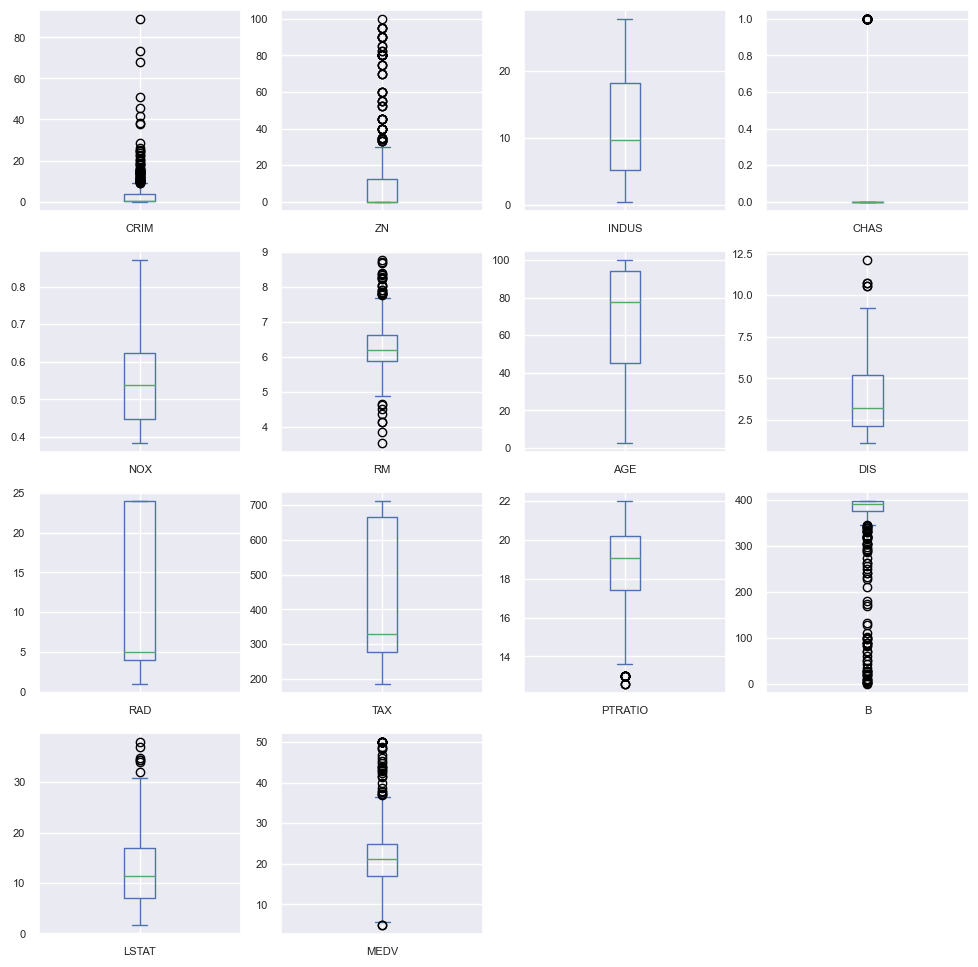

In [102]:
# Hacemos boxplot de las variables del dataset para comparar distribuciones y ver outliers.

df.plot(kind='box', subplots=True, layout=(4,4), fontsize=8, figsize=(12,12));

Las variables que escogeremos en adelante para nuestro estudio serán: RM, LSTAT y PTRATIO

### Exercici 1: Crea almenys dos models de regressió diferents per intentar predir el millor possible el preu de les vivendes (MEDV) de l'arxiu adjunt.

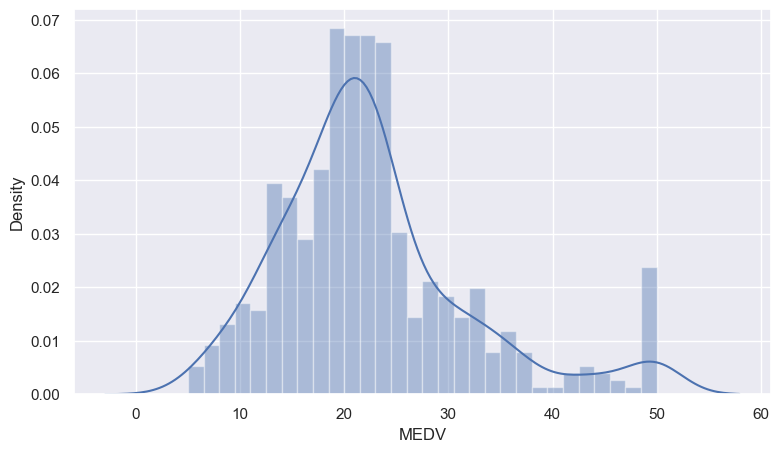

In [103]:
# vemos la distribución de MEDV

sns.distplot(df['MEDV'], bins=30)
plt.show()

Vemos que los valores de MEDV (valor medio viviendas en 1000$'s) se distribuyen con normalidad, aunque existen algunos outliers.

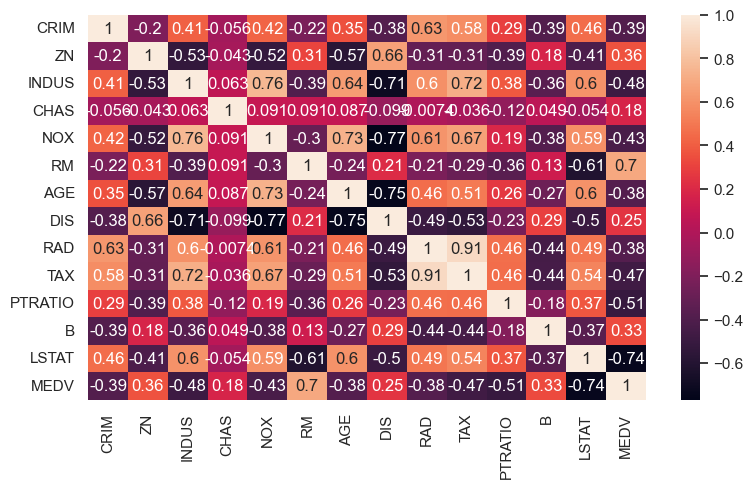

In [104]:
sns.heatmap(df.corr(),annot=True)
sns.set(rc={"figure.figsize": (12, 6)})

En la matriz de correlaciones, vemos que las variables que tienen mayor correlación con MEDV (valor medio) son LSTAT (clase social más baja) con correlación negativa de -0.74, seguido de RM (nº de habitaciones) con una correlación positiva de 0.7, y de PTRATIO (ratio profesor/alumno) con una correlación negativa de -0.51.

Las casas con más habitaciones (valor más alto de ‘RM’) implicarán más especio y valdrán más, tomando el resto de factores como constantes. Son variables directamente proporcionales.

Las vecindades de clase social más baja (mayor valor de ‘LSTAT’) valdrán menos. Si el porcentaje de personas de la clase trabajadora más baja es más alto, es probable que tengan un poder adquisitivo bajo y, por lo tanto, las casas cuesten menos. Son variables inversamente proporcionales. En resumen, un área de ciudadanos de clase baja tendrña menos demanda y por ende los precios serán más bajos.

Los vecindarios con más proporción de estudiantes por maestro (mayor valor de ‘PTRATIO’) valdrán menos. Son variables inversamente proporcionales.
Este es el escenario de las escuelas públicas, en donde el ratio de estudiantes por maestro es mayor y por tanto hay menos dedicación para con los estudiantes, en comparación con los centros privados. Los precios de viviendas cerca de escuelas públicas son generalmente más bajos que para aquellas cerca de escuelas privadas.

### 1.1 ---> Regresión lineal simple: 

Realizaremos una regresión lineal con una sola variable independiente, para predecir el precio de las viviendas.
La variable que escogeremos para este caso será LSTAT que tiene la correlación más alta (la cual es negativa) con la variable dependiente MEDV (precio / valor medio de las viviendas en 1000 $'s) de -0.74.

<Axes: xlabel='LSTAT', ylabel='MEDV'>

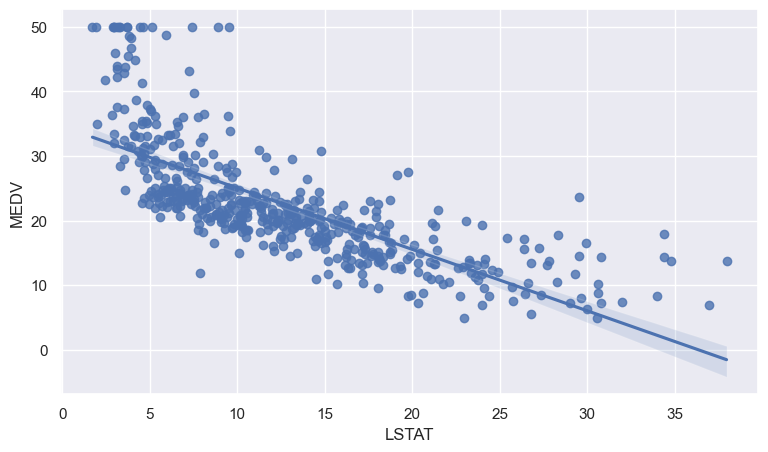

In [105]:
sns.set(rc={"figure.figsize": (9, 5)})
sns.regplot(y = df['MEDV'], x = df['LSTAT'])

En el gráfico anterior, comprobamos que LSTAT y MEDV están inversamente relacionadas. A medida que LSTAT aumenta, el precio disminuye, y viceversa. Ahora procederemos a realizar la regresión lineal de estas 2 variables:

In [106]:
X = df[['LSTAT']]
y = df['MEDV']

In [107]:
# Comprobamos si LSTAT es gausiano o no. Si no lo es, estandarizaremos con RobustScaler

from scipy.stats import shapiro

data = df['LSTAT']       
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probablemente gaussiano')
else:
    print('Probablemente no gaussiano')


stat=0.937, p=0.000
Probablemente no gaussiano


In [108]:
# Hacemos Robust scaler para LSTAT (la variable objetivo MEDV no la escalamos)
from sklearn.preprocessing import RobustScaler

scaler_X = RobustScaler()
X_scaled = scaler_X.fit_transform(X)

In [109]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [110]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(404, 1) (102, 1)
(404,) (102,)


In [111]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [112]:
y_pred = model.predict(X_test)

In [113]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio (MSE): {mse}")

Error cuadrático medio (MSE): 33.51954917268488


In [114]:
from sklearn.metrics import mean_squared_error, r2_score
import math

r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de determinación R2: {r2}")

Coeficiente de determinación R2: 0.5429180422970386


In [115]:
print(f"Intercepto del modelo: {model.intercept_}")

Intercepto del modelo: 23.857158774162496


El MEDV (valor medio viviendas en 1000$'s)     precio de venta previsto cuando la variable LSTAT es igual a 0, sería de 23.86 aprox.

In [116]:
coefficient = pd.DataFrame({'Variable': ['LSTAT'], 'Coefficient': model.coef_})
print(coefficient)

  Variable  Coefficient
0    LSTAT    -9.670142


Por cada aumento unitario en la variable 'LSTAT' (porcentaje de la población de bajos ingresos), se espera que el precio de la vivienda disminuya en aproximadamente 9.67 unidades.

In [117]:
#  precios reales y previstos
df_precios = pd.DataFrame({'Precio Real': y_test, 'Precio Previsto': y_pred})

# Imprimir el DataFrame
print(df_precios)

     Precio Real  Precio Previsto
173         23.6        26.099510
274         32.4        31.425096
491         13.6        17.371736
72          22.8        29.501699
452         16.1        18.144961
..           ...              ...
412         17.9         1.617283
436          9.6        17.391067
411         17.2        14.327164
86          22.5        22.407362
75          21.4        26.196164

[102 rows x 2 columns]


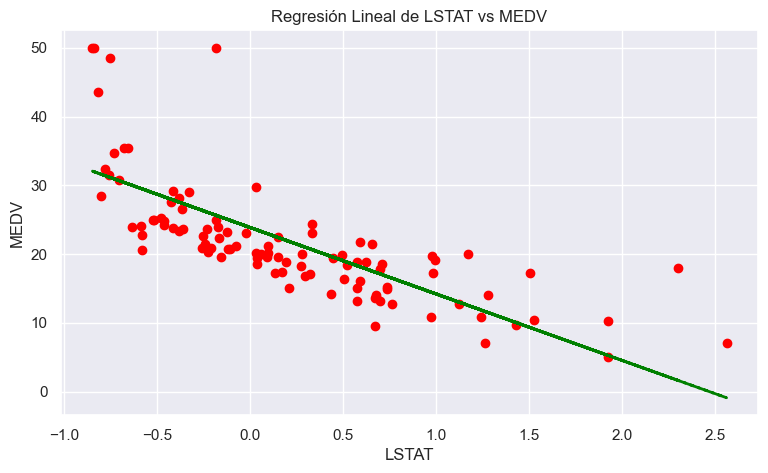

In [118]:
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, y_pred, color='green', linestyle='--', linewidth=2)
plt.title('Regresión Lineal de LSTAT vs MEDV')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()


Both RMSE and R- Squared quantifies how well a linear regression model fits a dataset. The RMSE tells how well a regression model can predict the value of a response variable in absolute terms while R- Squared tells how well the predictor variables can explain the variation in the response variable.

### 1.2 ---> Regresión lineal múltiple (con 3 variables)

En este caso, utilizaremos 3 variables para la predicción del precio: LSTAT, RM y PTRATIO.


<Axes: xlabel='RM', ylabel='MEDV'>

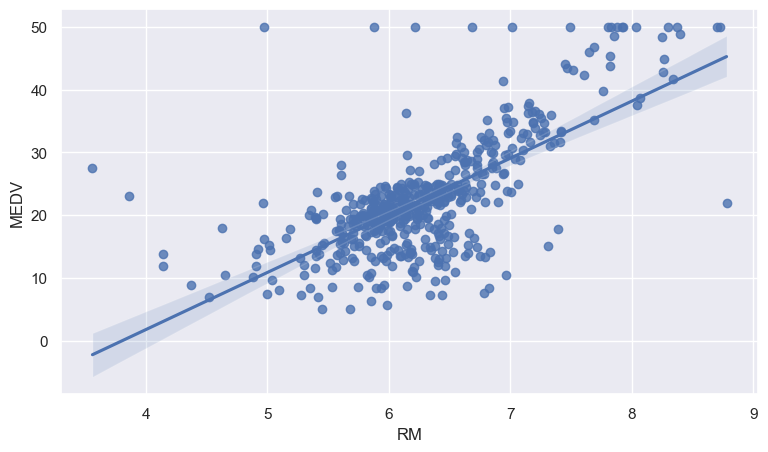

In [119]:
sns.set(rc={"figure.figsize": (9, 5)})
sns.regplot(y = df['MEDV'], x = df['RM'])

<Axes: xlabel='PTRATIO', ylabel='MEDV'>

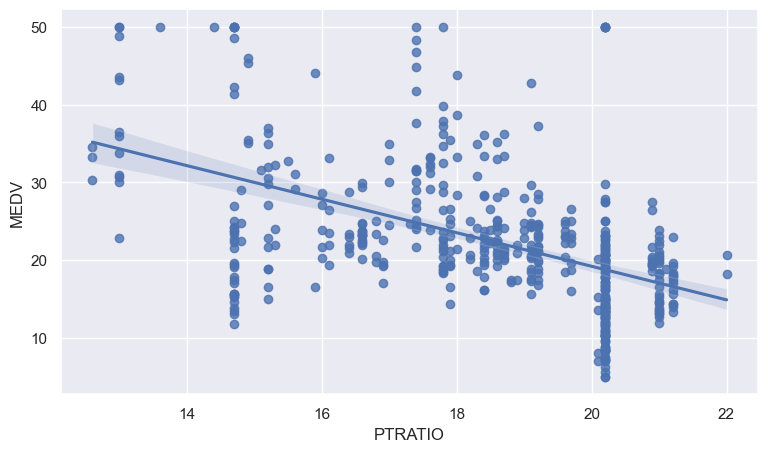

In [120]:
sns.set(rc={"figure.figsize": (9, 5)})
sns.regplot(y = df['MEDV'], x = df['PTRATIO'])

In [121]:
# Comprobamos si las variables son gaussianas o no, para ver si usamos RobustScaler

from scipy.stats import shapiro

data = df['RM']       
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probablemente gaussiano')
else:
    print('Probablemente no gaussiano')



stat=0.961, p=0.000
Probablemente no gaussiano


In [122]:
data = df['PTRATIO']       
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probablemente gaussiano')
else:
    print('Probablemente no gaussiano')

stat=0.904, p=0.000
Probablemente no gaussiano


In [123]:
X_mul = df[['LSTAT', 'RM', 'PTRATIO']]
y_mul = df['MEDV']

In [124]:
scaler = RobustScaler()
X_mul_scaled = scaler.fit_transform(X_mul)

In [125]:
from sklearn.model_selection import train_test_split
X_mul_train, X_mul_test, y_mul_train, y_mul_test = train_test_split(X_mul_scaled, y_mul, test_size=0.2, random_state=42)

In [126]:
model_1 = LinearRegression()

In [127]:
model_1.fit(X_mul_train, y_mul_train)

LinearRegression()

In [128]:
y_pred_mul = model_1.predict(X_mul_test)

In [129]:
mse = mean_squared_error(y_mul_test, y_pred_mul)
print(f"Error cuadrático medio (MSE): {mse}")

Error cuadrático medio (MSE): 27.114957415580548


In [130]:
r2 = r2_score(y_mul_test, y_pred_mul)
print(f"Coeficiente de determinación R2: {r2}")

Coeficiente de determinación R2: 0.6302528487272832


In [131]:
print(f"Intercepto del modelo: {model_1.intercept_}")

Intercepto del modelo: 22.254659492539655


Si las 3 variables independientes fuesen igual a 0, el precio previsto de venta se situría en 22.254

In [132]:
coefficients_1 = pd.DataFrame({'Variable': ['LSTAT', 'RM', 'PTRATIO'], 'Coefficient': model_1.coef_})
print(coefficients_1)

  Variable  Coefficient
0    LSTAT    -5.674094
1       RM     3.640641
2  PTRATIO    -2.427865


La variable LSTAT (clase social más baja) es la que más peso tiene en la determinación del valor previsto. Para cada aumento unitario en la variable 'LSTAT', se espera que el precio de la vivienda disminuya en 5.674 unidades.

Para cada aumento unitario en la variable 'PTRATIO' (ratio de estudiantes por maestro), se espera que el precio de la vivienda disminuya en 2.427 unidades.

Para cada aumento unitario en la variable 'RM' (nº de habitaciones por vivienda), se espera que el precio de la vivienda aumente en 3.640 unidades.

In [133]:
#  precios reales y previstos
df_precios_mul = pd.DataFrame({'Precio Real': y_mul_test, 'Precio Previsto': y_pred_mul})

# Imprimir el DataFrame
print(df_precios_mul)

     Precio Real  Precio Previsto
173         23.6        26.718396
274         32.4        30.663291
491         13.6        16.426377
72          22.8        24.728708
452         16.1        18.342368
..           ...              ...
412         17.9         0.411140
436          9.6        18.709041
411         17.2        17.878143
86          22.5        20.926314
75          21.4        24.312904

[102 rows x 2 columns]


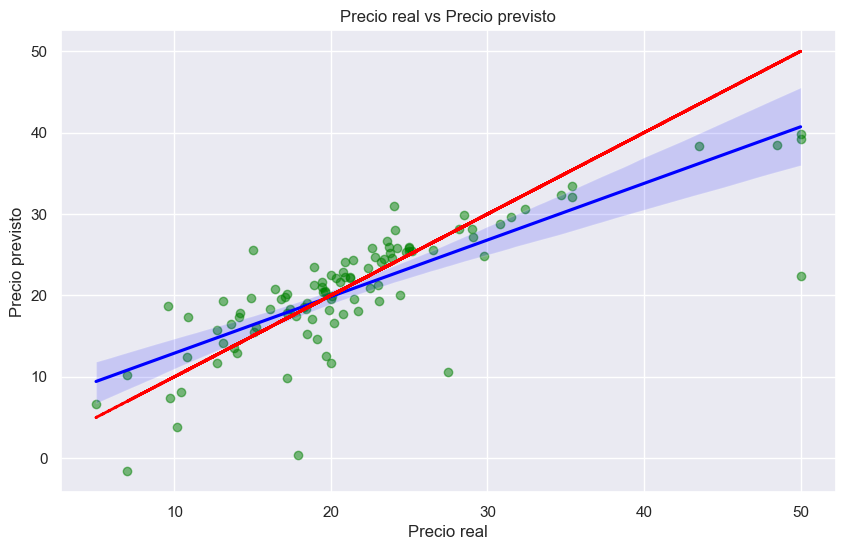

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score


plt.figure(figsize=(10, 6))
sns.regplot(x=y_mul_test, y=y_pred_mul, scatter_kws={'color': 'green', 'alpha': 0.5}, line_kws={'color': 'blue'})
plt.plot(df_precios['Precio Real'], df_precios['Precio Real'], color='red', linestyle='--', linewidth=2)


plt.xlabel("Precio real")
plt.ylabel("Precio previsto")
plt.title("Precio real vs Precio previsto")


plt.show()


### Exercici 2: Compara’ls en base al MSE i al R2.

REGRESION LINEAL SIMPLE:
Error cuadrático medio: 33.51954917268488
Coeficiente de determinación R^2: 0.5429180422970386

REGRESION LINEAL MULTIPLE:
Error cuadrático medio: Error cuadrático medio: 27.114957415580548
Coeficiente de determinación R^2: 0.6302528487272832


Podemos observar que los resultados obtenidos son más fiables en la regresión lineal múltiple que en la simple. Los precios predicción de precios es más ajustada en la regresión múltiple.

El hecho de introducir 2 variables independientes adicionales correlacionadas en el estudio, hace que el error cuadrático mejore en la regresión lineal múltiple. Se reduce de 33.52 a 27.11, y el coeficiente de determinación pasa de 0.54 a 0.63.

El 63% de la variabilidad en la variable dependiente puede explicarse por el modelo. Esto indica un ajuste moderado del modelo a los datos. Sin embargo, se podría mejorar, ya que un 37% de la variabilidad no se ha explicado.

El MSE de 27.11 en la regresión múltiple indica que, en promedio, los errores al cuadrado entre las predicciones de precios y los valores reales son de aproximadamente 27.11 unidades. Cuanto menor sea el MSE, mejor será el rendimiento del modelo.

### Exercici 3: Entrena’ls utilitzant els diferents paràmetres que admeten per intentar millorar-ne la predicció.

### 3.1 ---> Regression tree para regresión múltiple (LSTAT, RM, PTRATIO)

In [135]:
# Decision tree para regresión múltiple
# Este tipo de regresión no necesita escalado de variables

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

X_dt = df[['LSTAT', 'RM', 'PTRATIO']]
y_dt = df['MEDV']

X_dt_train, X_dt_test, y_dt_train, y_dt_test = train_test_split(X_dt, y_dt, test_size=0.2, random_state=42)

DT_reg = DecisionTreeRegressor()


In [136]:
DT_reg

DecisionTreeRegressor()

In [137]:
DT_reg.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [138]:
# probamos diversos parámetros

param_grid = {
    'max_depth': [3, 5, 7, 10, 14],
    'min_samples_split': [2, 5, 10, 12, 15],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'max_features': [None, 'sqrt', 'log2'],
    'ccp_alpha': [0.0, 0.1, 0.2, 0.5, 0.7]
}

In [139]:
grid_search = GridSearchCV(DT_reg, param_grid, cv=14, scoring='neg_mean_squared_error')

# el modelo más preciso es con CV = 14

In [140]:
grid_search.fit(X_dt_train, y_dt_train)

GridSearchCV(cv=14, estimator=DecisionTreeRegressor(),
             param_grid={'ccp_alpha': [0.0, 0.1, 0.2, 0.5, 0.7],
                         'max_depth': [3, 5, 7, 10, 14],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 6, 8, 10],
                         'min_samples_split': [2, 5, 10, 12, 15]},
             scoring='neg_mean_squared_error')

In [141]:
print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'ccp_alpha': 0.1, 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 12}


In [142]:
# Obtenemos el modelo con los mejores parámetros
best_regressor = DecisionTreeRegressor(**grid_search.best_params_)

# Entrenamos el modelo con el conjunto train
best_regressor.fit(X_dt_train, y_dt_train)

# Predecimos en el conjunto de test
y_pred_dt = best_regressor.predict(X_dt_test)

# Evaluamos el rendimiento en el conjunto de test
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_dt_test, y_pred_dt)
r2 = r2_score(y_dt_test, y_pred_dt)

print("Error Cuadrático Medio (MSE):", mse)
print("Coeficiente de Determinación (R^2):", r2)


Error Cuadrático Medio (MSE): 24.856244887470872
Coeficiente de Determinación (R^2): 0.6610532851805841


In [143]:
#  precios reales y previstos
df_precios_dt = pd.DataFrame({'Precio Real DT': y_dt_test, 'Precio Previsto DT': y_pred_dt})


print(df_precios_dt)

     Precio Real DT  Precio Previsto DT
173            23.6           23.359091
274            32.4           29.637500
491            13.6           16.359524
72             22.8           23.359091
452            16.1           16.359524
..              ...                 ...
412            17.9           14.152174
436             9.6           16.359524
411            17.2           10.900000
86             22.5           21.141935
75             21.4           23.359091

[102 rows x 2 columns]


Hemos mejorado el modelo de regresión lineal múltiple, rebajando el MSE a 24.856 y subiendo el R2 hasta 0.661.

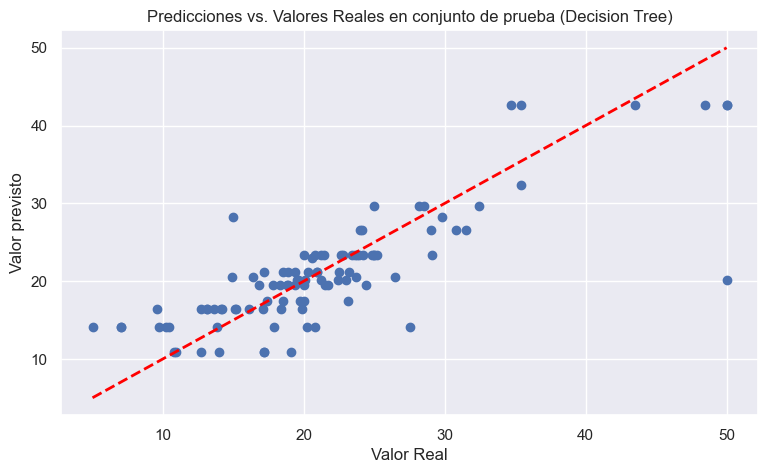

In [144]:
import matplotlib.pyplot as plt

plt.scatter(y_dt_test, y_pred_dt)
plt.xlabel("Valor Real")
plt.ylabel("Valor previsto")
plt.title("Predicciones vs. Valores Reales en conjunto de prueba (Decision Tree)")

plt.plot([min(y_dt_test), max(y_dt_test)], [min(y_dt_test), max(y_dt_test)], color='red', linestyle='--', linewidth=2)
plt.show()


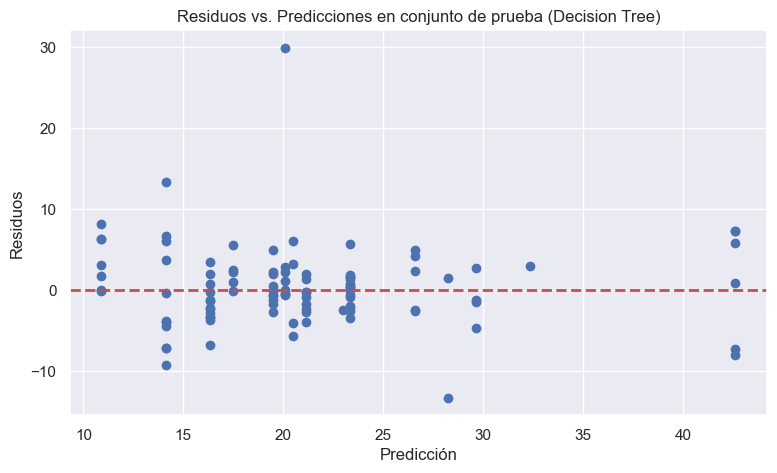

In [145]:
residuals = y_dt_test - y_pred_dt

plt.scatter(y_pred_dt, residuals)
plt.xlabel("Predicción")
plt.ylabel("Residuos")
plt.title("Residuos vs. Predicciones en conjunto de prueba (Decision Tree)")
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)  # Línea horizontal en y=0 para referencia
plt.show()


### 3.1 ---> Reg. Ridge Polinómica (LSTAT, RM, PTRATIO)

In [146]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error


X_ridge = df[['RM', 'LSTAT', 'PTRATIO']]
y_ridge = df['MEDV']


X_ridge_train, X_ridge_test, y_ridge_train, y_ridge_test = train_test_split(X_ridge, y_ridge, test_size=0.2, random_state=42)

# Normalizamos con Robust Scaler
scaler = RobustScaler()
X_ridge_train_scaled = scaler.fit_transform(X_ridge_train)
X_ridge_test_scaled = scaler.transform(X_ridge_test)

# modelo de regresión polinómica con Ridge
degree = 2
polyreg = make_pipeline(PolynomialFeatures(degree), Ridge())
polyreg.fit(X_ridge_train_scaled, y_ridge_train)

# Realizamos predicciones en el conjunto de prueba
y_ridge_pred_poly = polyreg.predict(X_ridge_test_scaled)

# Evaluamos el rendimiento del modelo polinómico
mse_poly = mean_squared_error(y_ridge_test, y_ridge_pred_poly)
print("Error cuadrático medio (MSE) en el conjunto de prueba (Ridge polinómico):", mse_poly)

r2 = r2_score(y_ridge_test, y_ridge_pred_poly)
print("R2 score Ridge Pol.:", r2)


Error cuadrático medio (MSE) en el conjunto de prueba (Ridge polinómico): 16.195018800740236
R2 score Ridge Pol.: 0.7791601891677327


In [147]:
# precios reales y previstos
df_precios_ridge = pd.DataFrame({'Precio Real Ridge': y_ridge_test, 'Precio Previsto Ridge': y_ridge_pred_poly})

print(df_precios_ridge)

     Precio Real Ridge  Precio Previsto Ridge
173               23.6              25.139949
274               32.4              31.689556
491               13.6              15.277740
72                22.8              26.395574
452               16.1              15.802796
..                 ...                    ...
412               17.9              12.673079
436                9.6              15.335854
411               17.2              13.267469
86                22.5              20.147738
75                21.4              23.958699

[102 rows x 2 columns]


In [148]:
params_polyreg = polyreg.get_params()
print("Parámetros modelo regresión polinómica con Ridge:")
print(params_polyreg)


Parámetros modelo regresión polinómica con Ridge:
{'memory': None, 'steps': [('polynomialfeatures', PolynomialFeatures()), ('ridge', Ridge())], 'verbose': False, 'polynomialfeatures': PolynomialFeatures(), 'ridge': Ridge(), 'polynomialfeatures__degree': 2, 'polynomialfeatures__include_bias': True, 'polynomialfeatures__interaction_only': False, 'polynomialfeatures__order': 'C', 'ridge__alpha': 1.0, 'ridge__copy_X': True, 'ridge__fit_intercept': True, 'ridge__max_iter': None, 'ridge__positive': False, 'ridge__random_state': None, 'ridge__solver': 'auto', 'ridge__tol': 0.0001}


In [149]:
from sklearn.model_selection import GridSearchCV

# Definimos el rango de valores para los parámetros
param_grid = {
    'polynomialfeatures__degree': [2, 3, 4],
    'ridge__alpha': [0.1, 1.0, 10.0],
}

# configuramos búsqueda en cuadrícula
grid_search = GridSearchCV(polyreg, param_grid, cv=5, scoring='neg_mean_squared_error')

# búsqueda en cuadrícula en tus datos
grid_search.fit(X_ridge_train_scaled, y_ridge_train)

# mejor combinación de parámetros
best_params_polyreg = grid_search.best_params_
print("Mejores parámetros:", best_params_polyreg)

# Obtenemos el mejor modelo
best_polyreg = grid_search.best_estimator_


Mejores parámetros: {'polynomialfeatures__degree': 2, 'ridge__alpha': 10.0}


In [150]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Realizar predicciones en el conjunto de prueba con el mejor modelo
y_pred_polyreg = best_polyreg.predict(X_ridge_test_scaled)


mse_polyreg = mean_squared_error(y_ridge_test, y_pred_polyreg)
print("MSE del mejor modelo:", mse_polyreg)

mae_polyreg = mean_absolute_error(y_ridge_test, y_pred_polyreg)
print("MAE del mejor modelo:", mae_polyreg)

r2_polyreg = r2_score(y_ridge_test, y_pred_polyreg)
print("R2 del mejor modelo:", r2_polyreg)


MSE del mejor modelo: 15.893085186904196
MAE del mejor modelo: 2.5633912529902187
R2 del mejor modelo: 0.7832774404648046


El modelo de Ridge polinómico, mejora notablemente el rendimiento del modelo y por tanto las predicciones. Con un MSE de 15.893 y un R2 de 0.783, es el modelo más ajustado.

### Exercici 4: Compara el seu rendiment emprant l’aproximació traint/test o emprant totes les dades (validació interna).

### 4.1. Cross Validation Reg. Lineal Simple

In [211]:
# Evaluamos el rendimiento del modelo en cada fold

from sklearn.model_selection import cross_val_score

# cross validation (tras hacer pruebas, el valor óptimo es con cv=8)
cv_scores = cross_val_score(model, X_scaled, y, cv=8, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-cv_scores)
r2_scores = cross_val_score(model, X_scaled, y, cv=8, scoring='r2')
r2_promedio = np.mean(r2_scores)

print("Resultados de la validación cruzada - Modelo lineal simple:")
print("RMSE para cada fold:", rmse_scores)
print("RMSE promedio:", np.mean(rmse_scores))
print("R2:",r2_scores)
print("R2 Promedio:", r2_promedio)


Resultados de la validación cruzada - Modelo lineal simple:
RMSE para cada fold: [4.60817233 4.23640665 7.21296751 7.72613258 8.07721077 8.08633476
 5.47698492 3.8268013 ]
RMSE promedio: 6.15637634964447
R2: [ 0.38416291  0.22634264  0.52379697  0.21692244  0.1732477   0.17798495
 -0.33895628  0.23628385]
R2 Promedio: 0.1999731490569177


El modelo tiene un rendimiento moderado. El RMSE promedio de 6.16 indica una magnitud moderada de errores de predicción en términos de las unidades de la variable objetivo. Además, el R2 promedio de 0.20 indica que el modelo explica aproximadamente el 20% de la variabilidad en la variable objetivo. 

In [209]:
cv_predictions = cross_val_predict(model, X_scaled, y, cv=8)

mse_cv = mean_squared_error(y, cv_predictions)

print("Predicciones de validación cruzada - Modelo lineal simple:")
print("MSE en validación cruzada:", mse_cv)

mae_cv = mean_absolute_error(y, cv_predictions)
print("MAE en validación cruzada:", mae_cv)

r2_cv = r2_score(y, cv_predictions)
print("R2 en validación cruzada:", r2_cv)


Predicciones de validación cruzada - Modelo lineal simple:
MSE en validación cruzada: 40.688073966543534
MAE en validación cruzada: 4.644413167157672
R2 en validación cruzada: 0.5180254929168815


Un MSE de 40.69 sugiere que, en promedio, los errores cuadráticos entre las predicciones y los valores reales son moderados.

El Error Absoluto Medio (MAE) mide el promedio de los errores absolutos entre las predicciones y los valores reales. Un valor de 4.64 indica que, en promedio, las predicciones difieren en alrededor de 4.64 unidades de la variable objetivo (MEDV)

Un R2 de 0.52 sugiere que aproximadamente el 52% de la variabilidad en la variable objetivo (MEDV) es explicada por el modelo, lo cual es un rendimiento moderado.


### 4.2. Cross Validation Reg. Lineal Múltiple

In [208]:
# Después de probar con diferentes valores de CV desde CV=5, el mejor modelo es con CV = 15

cv_scores = cross_val_score(model_1, X_mul_scaled, y, cv=15, scoring='neg_mean_squared_error')

rmse_scores = np.sqrt(-cv_scores)
r2_scores = cross_val_score(model_1, X_mul_scaled, y, cv=15, scoring='r2')
r2_promedio = np.mean(r2_scores)

print("Resultados de la valoración cruzada - Modelo lineal múltiple:")
print("RMSE para cada fold:", rmse_scores)
print("RMSE promedio:", np.mean(rmse_scores))
print("R2:",r2_scores)
print("R2 promedio:",r2_promedio)

Resultados de la valoración cruzada - Modelo lineal múltiple:
RMSE para cada fold: [ 3.0420384   2.91916253  2.86657666  2.54559075  5.99770424  5.81555544
  5.86564903  4.7459429   4.49494793  3.22084804 12.60980891  6.46898395
  6.56179597  3.70941495  3.29911343]
RMSE promedio: 4.94420887502223
R2: [ 0.7474162   0.69969254  0.69305693 -0.76264758  0.72528529  0.456575
  0.57628314  0.76035328  0.62181818  0.0526782  -0.39166465 -2.2749333
 -0.68079193 -0.29860349  0.56210169]
R2 promedio: 0.09910796583540504


Los resultados mejoran en la regresión lineal múltiple, con una reducción del RMSE promedio de 6.156 a 4.944 indicando que, en promedio, las predicciones del modelo se desvían en alrededor de 4.944 unidades de la variable objetivo (MEDV).


In [207]:
# Realizamos predicciones con validación cruzada
cv_predictions_1 = cross_val_predict(model_1, X_mul_scaled, y, cv=15)

# Calculamos el Mean Squared Error (MSE)
mse_cv_1 = mean_squared_error(y, cv_predictions_1)

# Calculamos el coeficiente de determinación (R2)
r2_cv_1 = r2_score(y, cv_predictions_1)

print("Predicciones de validación cruzada - Modelo lineal múltiple:")
print("Mean Squared Error (MSE) en validación cruzada:", mse_cv_1)
print("Coeficiente de Determinación (R^2) en validación cruzada:", r2_cv_1)

Predicciones de validación cruzada - Modelo lineal múltiple:
Mean Squared Error (MSE) en validación cruzada: 30.58039685188078
Coeficiente de Determinación (R^2) en validación cruzada: 0.6377569576969714


### 4.3. Cross Validation Degression Tree

In [206]:

from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_regressor, X_dt_train, y_dt_train, cv=14, scoring='neg_mean_squared_error')
avg_mse_cv = -scores.mean()
rmse_scores = np.sqrt(-cv_scores)

print("Resultados de la validación cruzada - Degression Tree:")
print("RMSE para cada fold:", rmse_scores)
print("RMSE promedio:", np.mean(rmse_scores))
print("MSE Promedio de Validación Cruzada:", avg_mse_cv)


Resultados de la validación cruzada - Degression Tree:
RMSE para cada fold: [4.86533845 3.73220124 5.76933607 4.13194591 3.2849191 ]
RMSE promedio: 4.356748154270945
MSE Promedio de Validación Cruzada: 26.939960402642857


In [203]:
# Realizamos predicciones con validación cruzada
cv_predictions_2 = cross_val_predict(best_regressor, X_dt, y, cv=15)

# Calculamos el Mean Squared Error (MSE)
mse_cv_2 = mean_squared_error(y_dt, cv_predictions_2)

# Calcular el coeficiente de determinación (R2)
r2_cv_2 = r2_score(y, cv_predictions_2)

print("Predicciones validación cruzada - Degression Tree:")
print("MSE en validación cruzada:", mse_cv_2)
print("R2 en validación cruzada:", r2_cv_2)

Predicciones validación cruzada - Degression Tree:
MSE en validación cruzada: 28.633569497717122
R2 en validación cruzada: 0.6608182890141163


Con la Cross Validation de Degression Tree, los resultados de MSE y R2 son muy similares a los obtenidos en la regresión lineal múltiple. El MSE es de 31.0189 y el R2 de 0.632561

### 4.4. Cross Validation Reg. Ridge Polinómica

In [202]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

best_polyreg_cv = make_pipeline(PolynomialFeatures(best_params_polyreg['polynomialfeatures__degree']), Ridge(alpha=best_params_polyreg['ridge__alpha']))

# cross validation
cv_scores = cross_val_score(best_polyreg_cv, X_ridge_train_scaled, y_ridge_train, scoring='neg_mean_squared_error', cv=kf)

# Convertimos los scores negativos a positivos. Calculamos mse y rmse
cv_mse_mean = -cv_scores.mean()
cv_rmse_mean = np.sqrt(cv_mse_mean)

print("Resultados de la validación cruzada - Ridge Polinómico:")
print("MSE en validación cruzada (Ridge polinómico):", cv_mse_mean)
print("RMSE en validación cruzada (Ridge polinómico):", cv_rmse_mean)


Resultados de la validación cruzada - Ridge Polinómico:
MSE en validación cruzada (Ridge polinómico): 19.749950706291145
RMSE en validación cruzada (Ridge polinómico): 4.444091662678791


El MSE en validación cruzada es ligeramente mayor que el MSE del mejor modelo Ridge, lo cual es esperado, ya que la validación cruzada proporciona una evaluación más conservadora del rendimiento del modelo.

In [212]:
# Realizar predicciones con validación cruzada
cv_predictions_3 = cross_val_predict(best_polyreg_cv, X_ridge, y_ridge, cv=15)

# Calculamos el Mean Squared Error (MSE)
mse_cv_3 = mean_squared_error(y_ridge, cv_predictions_3)

# Calculamos el coeficiente de determinación (R2)
r2_cv_3 = r2_score(y_ridge, cv_predictions_3)

print("Predicciones validación cruzada - Ridge Polinómico:")
print("Mean Squared Error (MSE) en validación cruzada:", mse_cv_3)
print("Coeficiente de Determinación (R^2) en validación cruzada:", r2_cv_3)

Predicciones validación cruzada - Ridge Polinómico:
Mean Squared Error (MSE) en validación cruzada: 22.05354265870286
Coeficiente de Determinación (R^2) en validación cruzada: 0.7387626319912584


Podemos constatar que, tras realizar las Cross Validations a los diferentes modelos de regresión, el mejor modelo es el de Ridge Polinómico, con MSE que disminuye hasta 22.05, y un R2 que aumenta hasta el 0.7387, explica una parte significativa de la variabilidad (el 73,87%) en la variable objetivo (MEDV), mejorando sensiblemente la predicción de precios. El modelo tiene un buen ajuste a los datos.
En resumen, los resultados son coherentes con los obtenidos en la evaluación general de validación cruzada.

### Exercici 5: No facis servir la variable del nombre d'habitacions (RM) a l’hora de fer prediccions.



In [157]:
# De nuestro modelo de regresión múltiple, eliminaremos la variable RM

X_mul_1 = df[['LSTAT',  'PTRATIO']]
y_mul_1 = df['MEDV']

In [158]:
scaler = RobustScaler()
X_mul_1_scaled = scaler.fit_transform(X_mul_1)

In [159]:
from sklearn.model_selection import train_test_split

X_mul_1_train, X_mul_1_test, y_mul_1_train, y_mul_1_test = train_test_split(X_mul_1_scaled, y_mul_1, test_size=0.3, random_state=42)
    

In [160]:
model_2 = LinearRegression()

In [161]:
model_2.fit(X_mul_1_train, y_mul_1_train)

LinearRegression()

In [162]:
y_pred_mul_1 = model_2.predict(X_mul_1_test)

In [198]:
mse = mean_squared_error(y_mul_1_test, y_pred_mul_1)
print(f"Error cuadrático medio (MSE): {mse}")

r2 = r2_score(y_mul_1_test, y_pred_mul_1)
print(f"Coeficiente de determinación R2: {r2}")

Error cuadrático medio (MSE): 32.03317656706244
Coeficiente de determinación R2: 0.5701000431811827


In [165]:
print(f"Intercepto del modelo: {model_2.intercept_}")

Intercepto del modelo: 23.112580141819866


El intercepto sería el valor previsto si las variables independientes (LSTAT y PTRATIO) fuesen igual a 0. En ese caso, el valor previsto de la vivenda sería de 23.11.


In [166]:
coefficients_2 = pd.DataFrame({'Variable': ['LSTAT',  'PTRATIO'], 'Coefficient': model_2.coef_})
print(coefficients_2)

  Variable  Coefficient
0    LSTAT    -8.647669
1  PTRATIO    -2.975451


Para cada aumento unitario en la variable 'LSTAT' (porcentaje de la población de bajos ingresos), se espera que el precio de la vivienda disminuya en aproximadamente 8.65 unidades. Lo que nos confirma que, pudiendo siempre depender de otros factores que lo alterasen, las viviendas en barrios de clase social son máa baratas.

Para cada aumento unitario en la variable 'PTRATIO' (ratio de estudiantes por maestro), se espera que el precio de la vivienda disminuya en aproximadamente 2.98 unidades. En zonas donde el ratio de alumnos por profesor sea más elevado, el precio de las viviendas de los alrededores será más bajo.

In [167]:
#  precios reales y previstos
df_precios_mul_1 = pd.DataFrame({'Precio Real': y_mul_1_test, 'Precio Previsto': y_pred_mul_1})

# Imprimir el DataFrame
print(df_precios_mul_1)

     Precio Real  Precio Previsto
173         23.6        27.721357
274         32.4        31.421180
491         13.6        16.197100
72          22.8        28.000896
452         16.1        16.782302
..           ...              ...
441         17.1        14.837549
23          14.5        13.676259
225         50.0        30.682944
433         14.3        17.689853
447         12.6        17.499699

[152 rows x 2 columns]


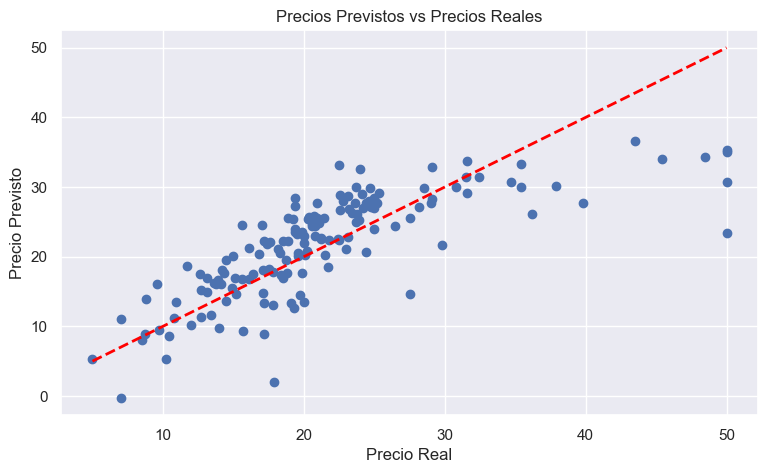

In [168]:
plt.scatter(df_precios_mul_1['Precio Real'], df_precios_mul_1['Precio Previsto'])
plt.plot([df_precios_mul_1['Precio Real'].min(), df_precios_mul_1['Precio Real'].max()],
         [df_precios_mul_1['Precio Real'].min(), df_precios_mul_1['Precio Real'].max()],
         linestyle='--', color='red', linewidth=2)


plt.title('Precios Previstos vs Precios Reales')
plt.xlabel('Precio Real')
plt.ylabel('Precio Previsto')
plt.show()

Era previsible que, siendo RM la segunda variable con mayor correlación con MEDV, la predicción de precios una vez eliminada la variable RM empeore. Hemos pasado de tener un MSE de 27.11 a uno de 32.03. 

El nuevo coeficiente de determinación R2: 0.5701 también empeora ya que anteriormente era de 0.63025.
